# Banking Customer Churn Analysis

'It is cheaper to keep an existing customer than to onbaord a new customer'

The aim with this analysis is to identify which existing customers within a bank are at risk of churning by looking at the available data. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, ttest_ind

from src.preprocessing import initial_preprocessing, model_preprocessing

## EDA

It is useful to inspect the data before any analysis is completed to better understand the direction that the analysis should head. 

Also, it is useful to weed out mistakes/errors and to inform the preprocessing step. 

### Initial EDA

This is just the visualisation of the features, target class, and the relationships between them before any preprocessing that might hinder interpretability. 

In [2]:
# Import data
original_data = pd.read_csv('data/Customer-Churn-Records.csv')
original_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
original_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [3]:
# Check for missing/faulty values
for i, col in enumerate(original_data.columns):
    print(f'Number of Missing Datapoints in Column {col}: {original_data[col].isnull().sum()}')


Number of Missing Datapoints in Column RowNumber: 0
Number of Missing Datapoints in Column CustomerId: 0
Number of Missing Datapoints in Column Surname: 0
Number of Missing Datapoints in Column CreditScore: 0
Number of Missing Datapoints in Column Geography: 0
Number of Missing Datapoints in Column Gender: 0
Number of Missing Datapoints in Column Age: 0
Number of Missing Datapoints in Column Tenure: 0
Number of Missing Datapoints in Column Balance: 0
Number of Missing Datapoints in Column NumOfProducts: 0
Number of Missing Datapoints in Column HasCrCard: 0
Number of Missing Datapoints in Column IsActiveMember: 0
Number of Missing Datapoints in Column EstimatedSalary: 0
Number of Missing Datapoints in Column Exited: 0
Number of Missing Datapoints in Column Complain: 0
Number of Missing Datapoints in Column Satisfaction Score: 0
Number of Missing Datapoints in Column Card Type: 0
Number of Missing Datapoints in Column Point Earned: 0


In [4]:
# Check for duplicated customers
duplicate_ids = original_data[original_data['CustomerId'].duplicated(keep=False)]['CustomerId']
print(f'Duplicate CustomersIds: {duplicate_ids.unique()}')

Duplicate CustomersIds: []


In [5]:
categorical_cols = ['Gender', 'Geography', 'Card Type']

binary_cols = ['HasCrCard', 'IsActiveMember', 'Complain']

ordinal_cols = ['NumOfProducts', 'Satisfaction Score', 'Tenure']

continuous_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/3797858117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/3797858117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/3797858117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=original_data, x=col, ax=ax[i], palette='Set2'

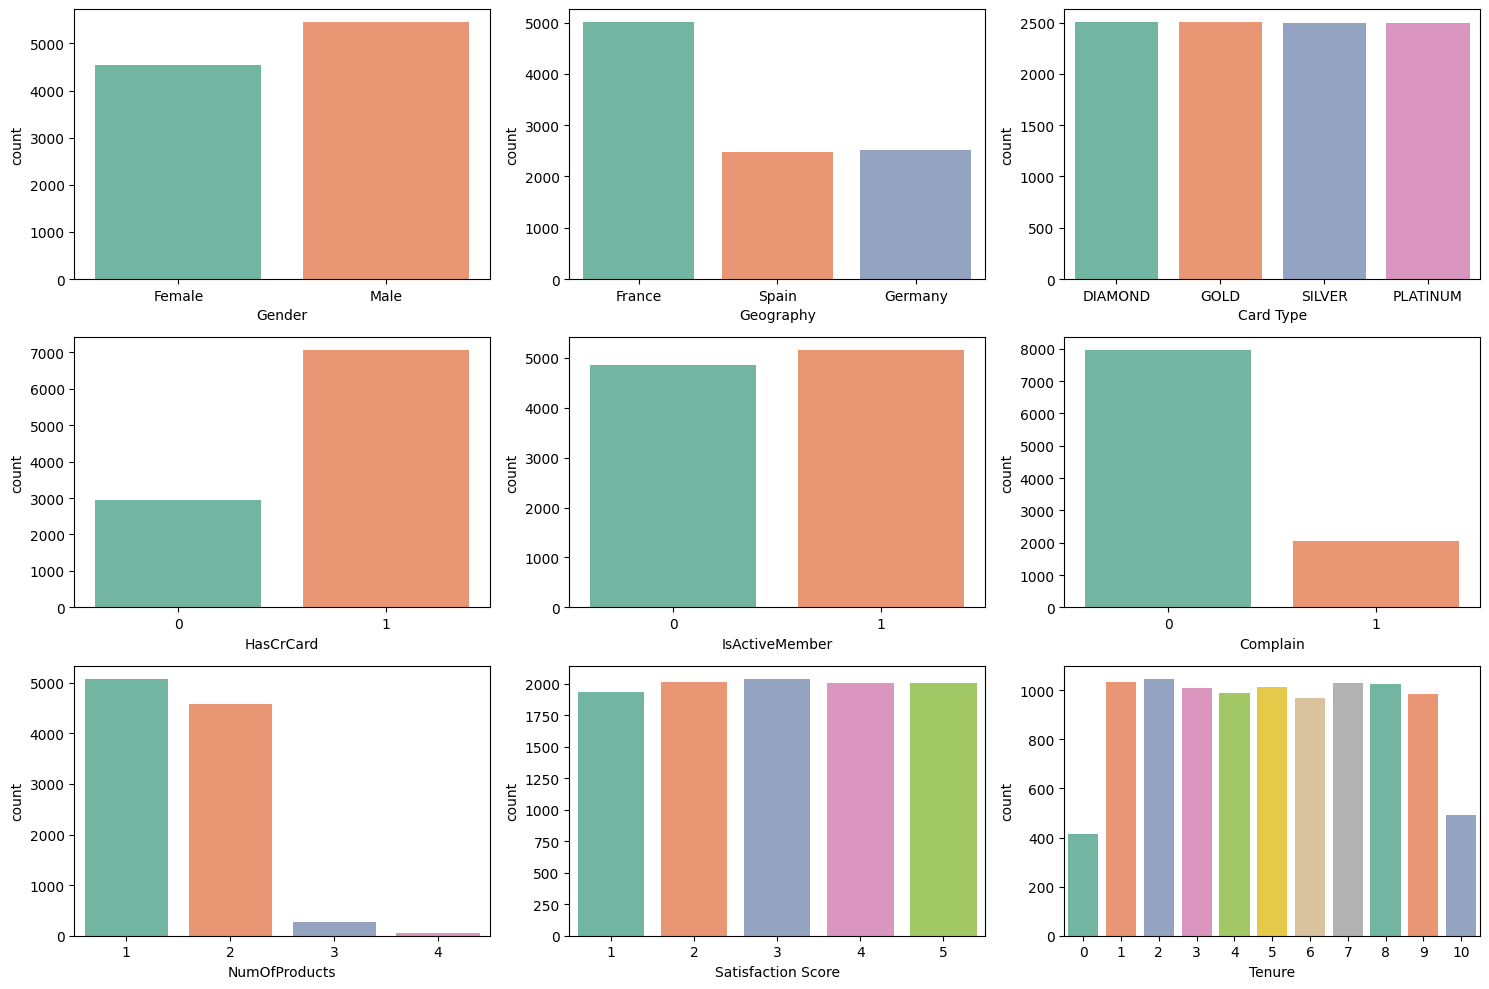

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()

for i , col in enumerate(categorical_cols + binary_cols + ordinal_cols):
    if i < len(ax):
        sns.countplot(data=original_data, x=col, ax=ax[i], palette='Set2')
        
plt.tight_layout()
        

/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/2125993503.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/2125993503.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/2125993503.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/2125993503.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=original_data, x=col, ax=ax[i], palette='Set2')
/var/folders/1q/9q_v21ys6h9ggy25z5fw5_000000gn/T/ipykernel_74819/2125993503.py:6: UserWarnin

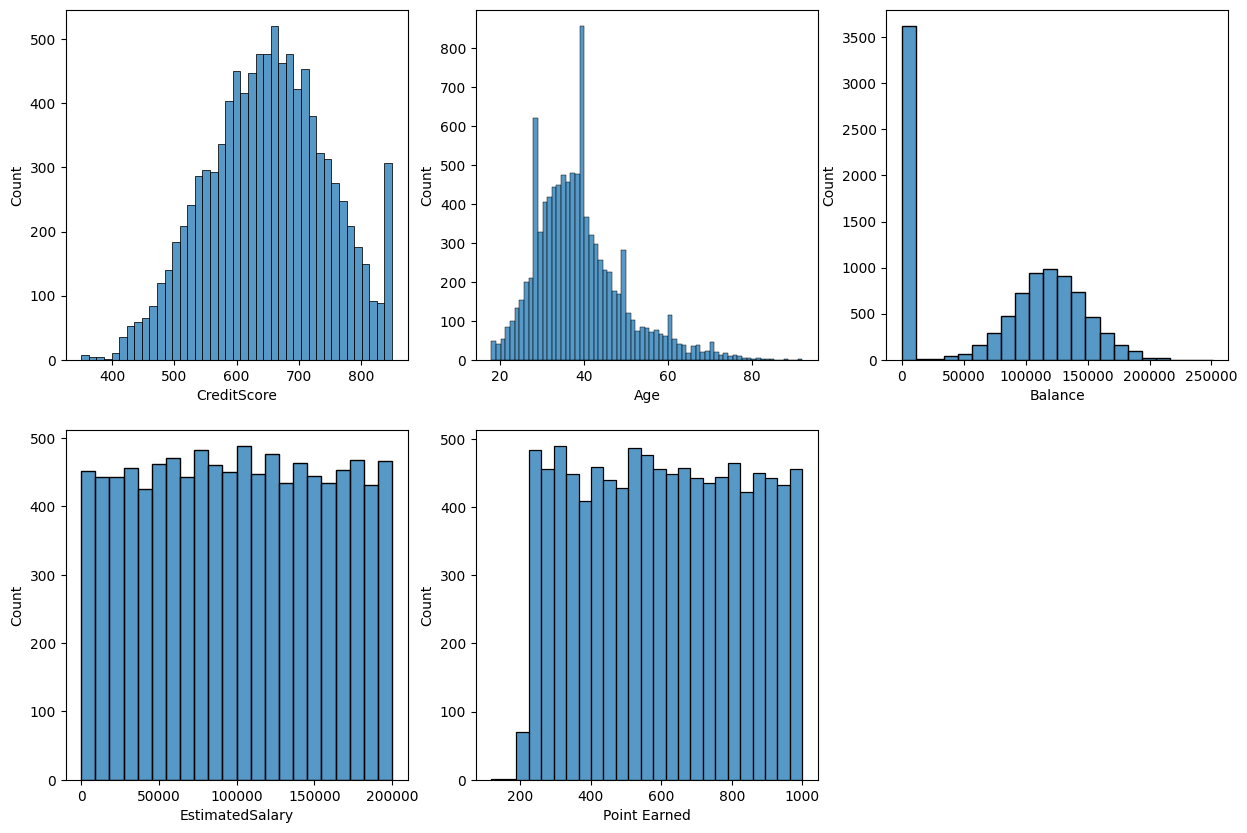

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i , col in enumerate(continuous_cols):
    if i < len(ax):
        sns.histplot(data=original_data, x=col, ax=ax[i], palette='Set2')

for j in range(len(continuous_cols), len(ax)):
    ax[j].set_visible(False)
        
        


Takeaways: 

- 10,000 unique customers
- Clean and valid dataset. 
- The target variable is 'Exited', with a heavy class imbalance of 4:1. 
- There appears to be a strong correlation between complaints and exited. This needs to be investigated further and to prevent any issues later in the prediction step. 

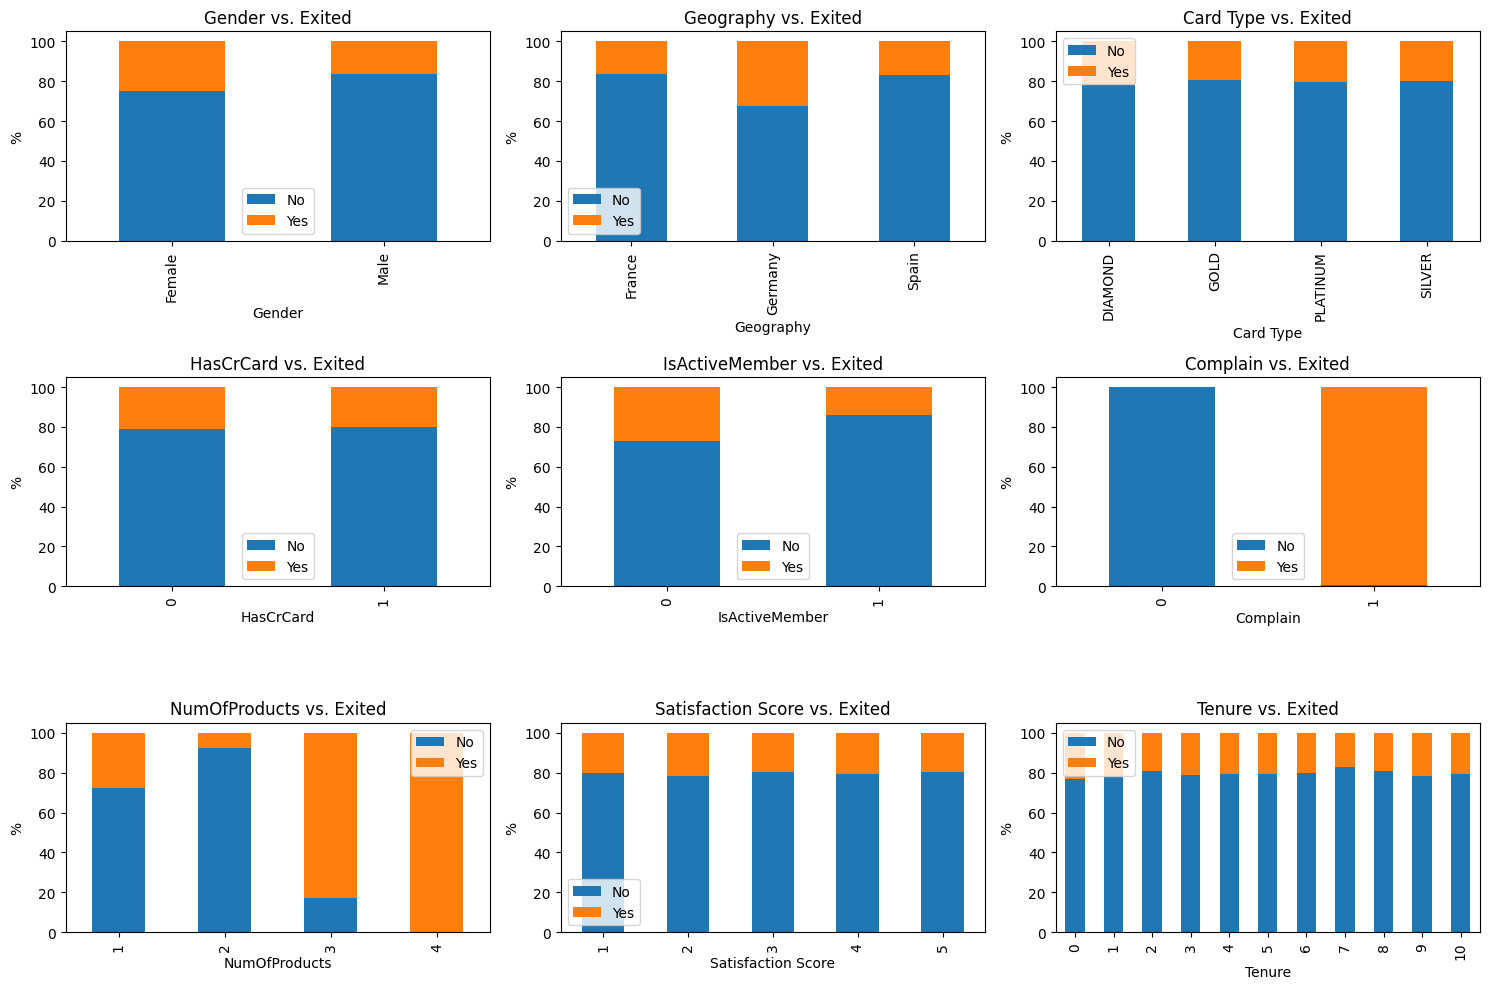

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(categorical_cols + binary_cols + ordinal_cols):
    if i < len(ax):
        # Create a crosstab for stacked bar chart
        crosstab = pd.crosstab(original_data[col], original_data['Exited'].replace({0: 'No', 1: 'Yes'}), normalize='index') * 100
        
        crosstab.plot(kind='bar', stacked=True, ax=ax[i])
        ax[i].set_title(f'{col} vs. Exited')
        ax[i].set_ylabel('%')
        ax[i].set_xlabel(col)
        ax[i].legend(['No', 'Yes'])
    else:
        ax[i].set_visible(False)
        
plt.tight_layout()
plt.show()

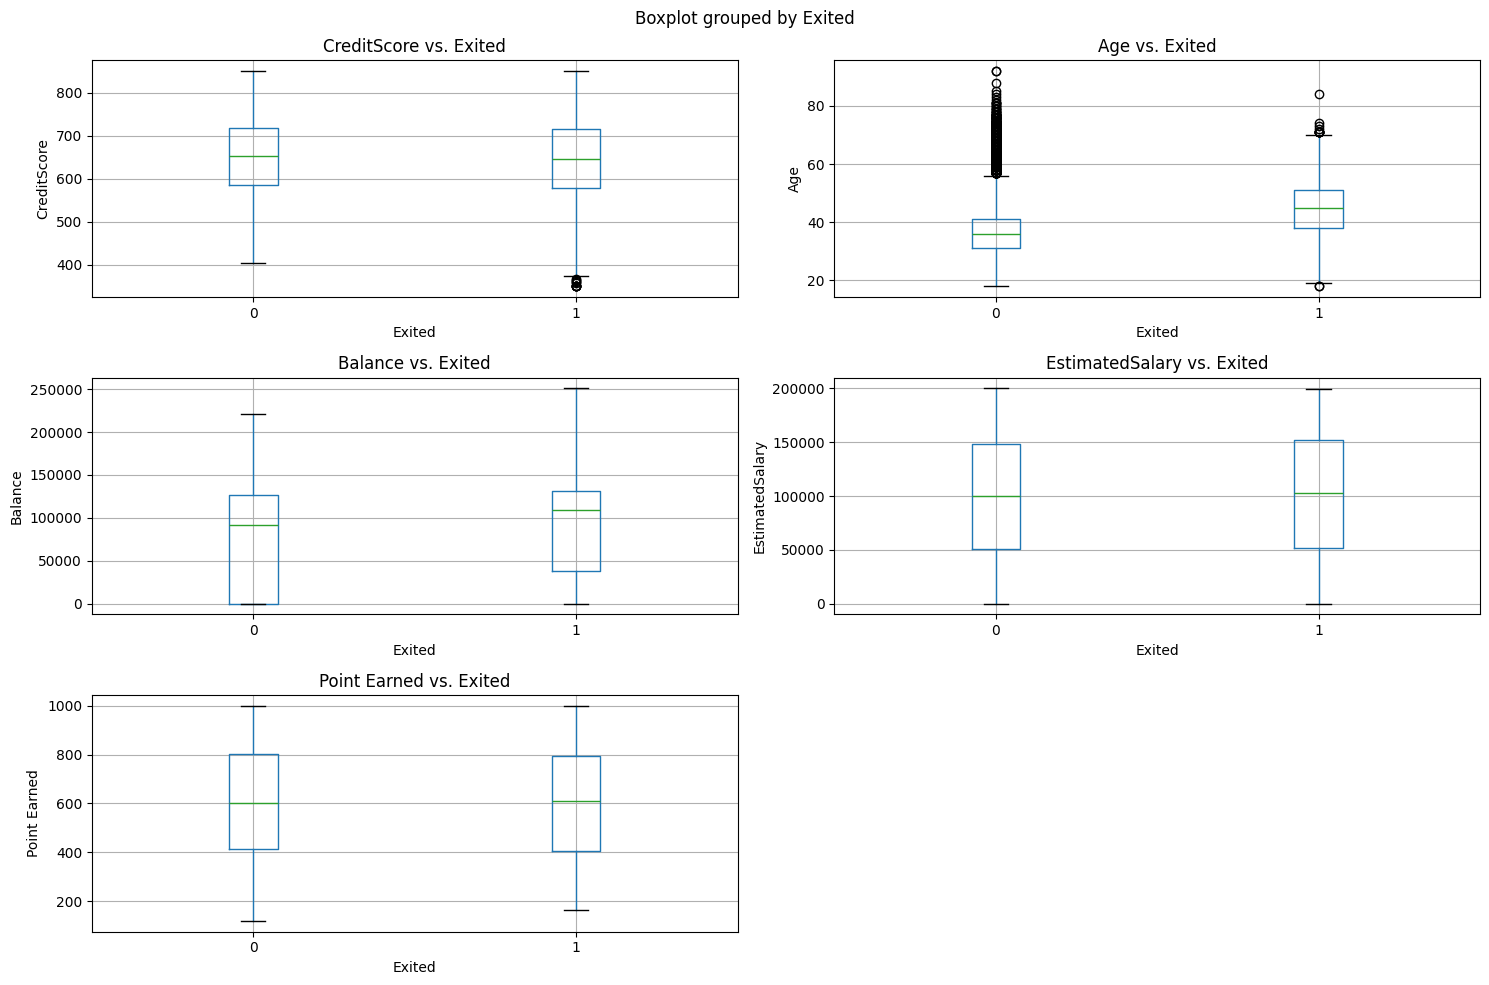

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(continuous_cols):
    if i < len(ax):
        original_data.boxplot(column=col, by='Exited', ax=ax[i])
        ax[i].set_title(f'{col} vs. Exited')
        ax[i].set_xlabel('Exited')
        ax[i].set_ylabel(col)

for j in range(len(continuous_cols), len(ax)):
    ax[j].set_visible(False)
    
plt.tight_layout()
plt.show()


## Preprocessing

This is the process of cleaning the data for further analysis, using methods such as correlation and statistical analysis between the features and target variables. 

In [12]:
cleaned_data = initial_preprocessing(original_data, categorical_cols)
categorical_cols = ['Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

## Correlation Matrix

<Axes: >

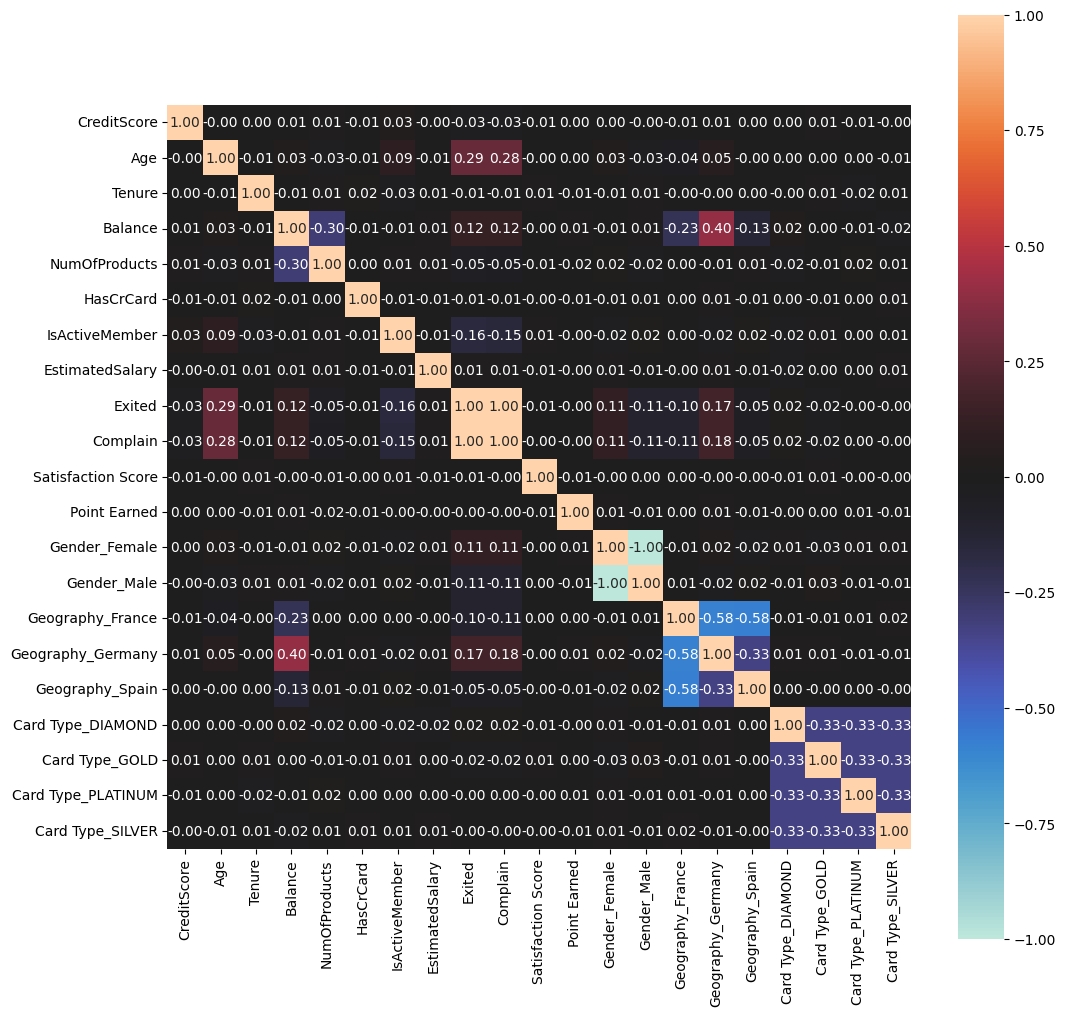

In [13]:
corr_matrix = cleaned_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, center=0, square=True, fmt='.2f')

There appears to be perfect correlation between complain and exited. This could pose as a problem during prediction, so it may be useful to remove the feature to prevent leakage. Otherwise, the other features seem to be uncorrelated. 

## Statistical Analysis

2 types of analysis: chi-square and Cramer's V for categorical, ordinal, binary variables and t-test and Cohen's D for continuous variables. 

In [14]:
chi2_results = []

for col in categorical_cols + ordinal_cols + binary_cols:
    # Create contingency table/crosstab
    crosstab = pd.crosstab(cleaned_data[col], cleaned_data['Exited'])
    
    # Chi Square Test
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    # Cramer's V
    n = crosstab.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    
    chi2_results.append({
        'Variable': col,
        'Chi2': chi2,
        'p_value': p_value,
        'Cramers_V': cramers_v,
        'Significant': p_value < 0.05
    })
    
    # Print results
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{col:20} | Chi2: {chi2:8.2f} | p-value: {p_value:.6f} {significance} | Cramér's V: {cramers_v:.4f}")
    
print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")
print("Cramér's V: 0.1 = small, 0.3 = medium, 0.5 = large")

Gender_Female        | Chi2:   112.40 | p-value: 0.000000 *** | Cramér's V: 0.1060
Gender_Male          | Chi2:   112.40 | p-value: 0.000000 *** | Cramér's V: 0.1060
Geography_France     | Chi2:   109.08 | p-value: 0.000000 *** | Cramér's V: 0.1044
Geography_Germany    | Chi2:   299.38 | p-value: 0.000000 *** | Cramér's V: 0.1730
Geography_Spain      | Chi2:    27.58 | p-value: 0.000000 *** | Cramér's V: 0.0525
Card Type_DIAMOND    | Chi2:     3.92 | p-value: 0.047673 * | Cramér's V: 0.0198
Card Type_GOLD       | Chi2:     2.47 | p-value: 0.116212  | Cramér's V: 0.0157
Card Type_PLATINUM   | Chi2:     0.00 | p-value: 1.000000  | Cramér's V: 0.0000
Card Type_SILVER     | Chi2:     0.13 | p-value: 0.722764  | Cramér's V: 0.0035
NumOfProducts        | Chi2:  1501.50 | p-value: 0.000000 *** | Cramér's V: 0.3875
Satisfaction Score   | Chi2:     3.80 | p-value: 0.433365  | Cramér's V: 0.0195
Tenure               | Chi2:    14.06 | p-value: 0.170351  | Cramér's V: 0.0375
HasCrCard            

In [15]:
t_test_results = []

for col in continuous_cols:
    # Split data by churn status
    churn_no = cleaned_data[cleaned_data['Exited'] == 0][col].dropna()
    churn_yes = cleaned_data[cleaned_data['Exited'] == 1][col].dropna()
    
    # Perform t-test
    t_stat, p_value = ttest_ind(churn_no, churn_yes)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(churn_no) - 1) * churn_no.var() + 
                         (len(churn_yes) - 1) * churn_yes.var()) / 
                        (len(churn_no) + len(churn_yes) - 2))
    cohens_d = (churn_no.mean() - churn_yes.mean()) / pooled_std
    
    # Store results
    t_test_results.append({
        'Variable': col,
        't_statistic': t_stat,
        'p_value': p_value,
        'Cohens_d': cohens_d,
        'Mean_No': churn_no.mean(),
        'Mean_Yes': churn_yes.mean(),
        'Significant': p_value < 0.05
    })
    
    # Print results
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{col:20} | t: {t_stat:8.2f} | p-value: {p_value:.6f} {significance} | Cohen's d: {cohens_d:.4f}")
    print(f"{'':20} | Mean (No): {churn_no.mean():.2f} | Mean (Yes): {churn_yes.mean():.2f}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")
print("Cohen's d: 0.2 = small, 0.5 = medium, 0.8 = large")

CreditScore          | t:     2.68 | p-value: 0.007422 ** | Cohen's d: 0.0665
                     | Mean (No): 651.84 | Mean (Yes): 645.41
Age                  | t:   -29.76 | p-value: 0.000000 *** | Cohen's d: -0.7389
                     | Mean (No): 37.41 | Mean (Yes): 44.84
Balance              | t:   -11.94 | p-value: 0.000000 *** | Cohen's d: -0.2964
                     | Mean (No): 72742.75 | Mean (Yes): 91109.48
EstimatedSalary      | t:    -1.25 | p-value: 0.211715  | Cohen's d: -0.0310
                     | Mean (No): 99726.85 | Mean (Yes): 101509.91
Point Earned         | t:     0.46 | p-value: 0.643535  | Cohen's d: 0.0115
                     | Mean (No): 607.04 | Mean (Yes): 604.45

Significance levels: *** p<0.001, ** p<0.01, * p<0.05
Cohen's d: 0.2 = small, 0.5 = medium, 0.8 = large


SIGNIFICANT VARIABLES (p < 0.05)

Categorical Variables:
  NumOfProducts        | p = 0.000000 | Cramér's V = 0.3875
  Complain             | p = 0.000000 | Cramér's V = 0.9954
  Geography_Germany    | p = 0.000000 | Cramér's V = 0.1730
  IsActiveMember       | p = 0.000000 | Cramér's V = 0.1561
  Gender_Female        | p = 0.000000 | Cramér's V = 0.1060
  Gender_Male          | p = 0.000000 | Cramér's V = 0.1060
  Geography_France     | p = 0.000000 | Cramér's V = 0.1044
  Geography_Spain      | p = 0.000000 | Cramér's V = 0.0525
  Card Type_DIAMOND    | p = 0.047673 | Cramér's V = 0.0198

Numerical Variables:
  Age                  | p = 0.000000 | Cohen's d = -0.7389
  Balance              | p = 0.000000 | Cohen's d = -0.2964
  CreditScore          | p = 0.007422 | Cohen's d = 0.0665


/Users/nguyendog/code/venvs/finance_ml_venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nguyendog/code/venvs/finance_ml_venv/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/Users/nguyendog/code/venvs/finance_ml_venv/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


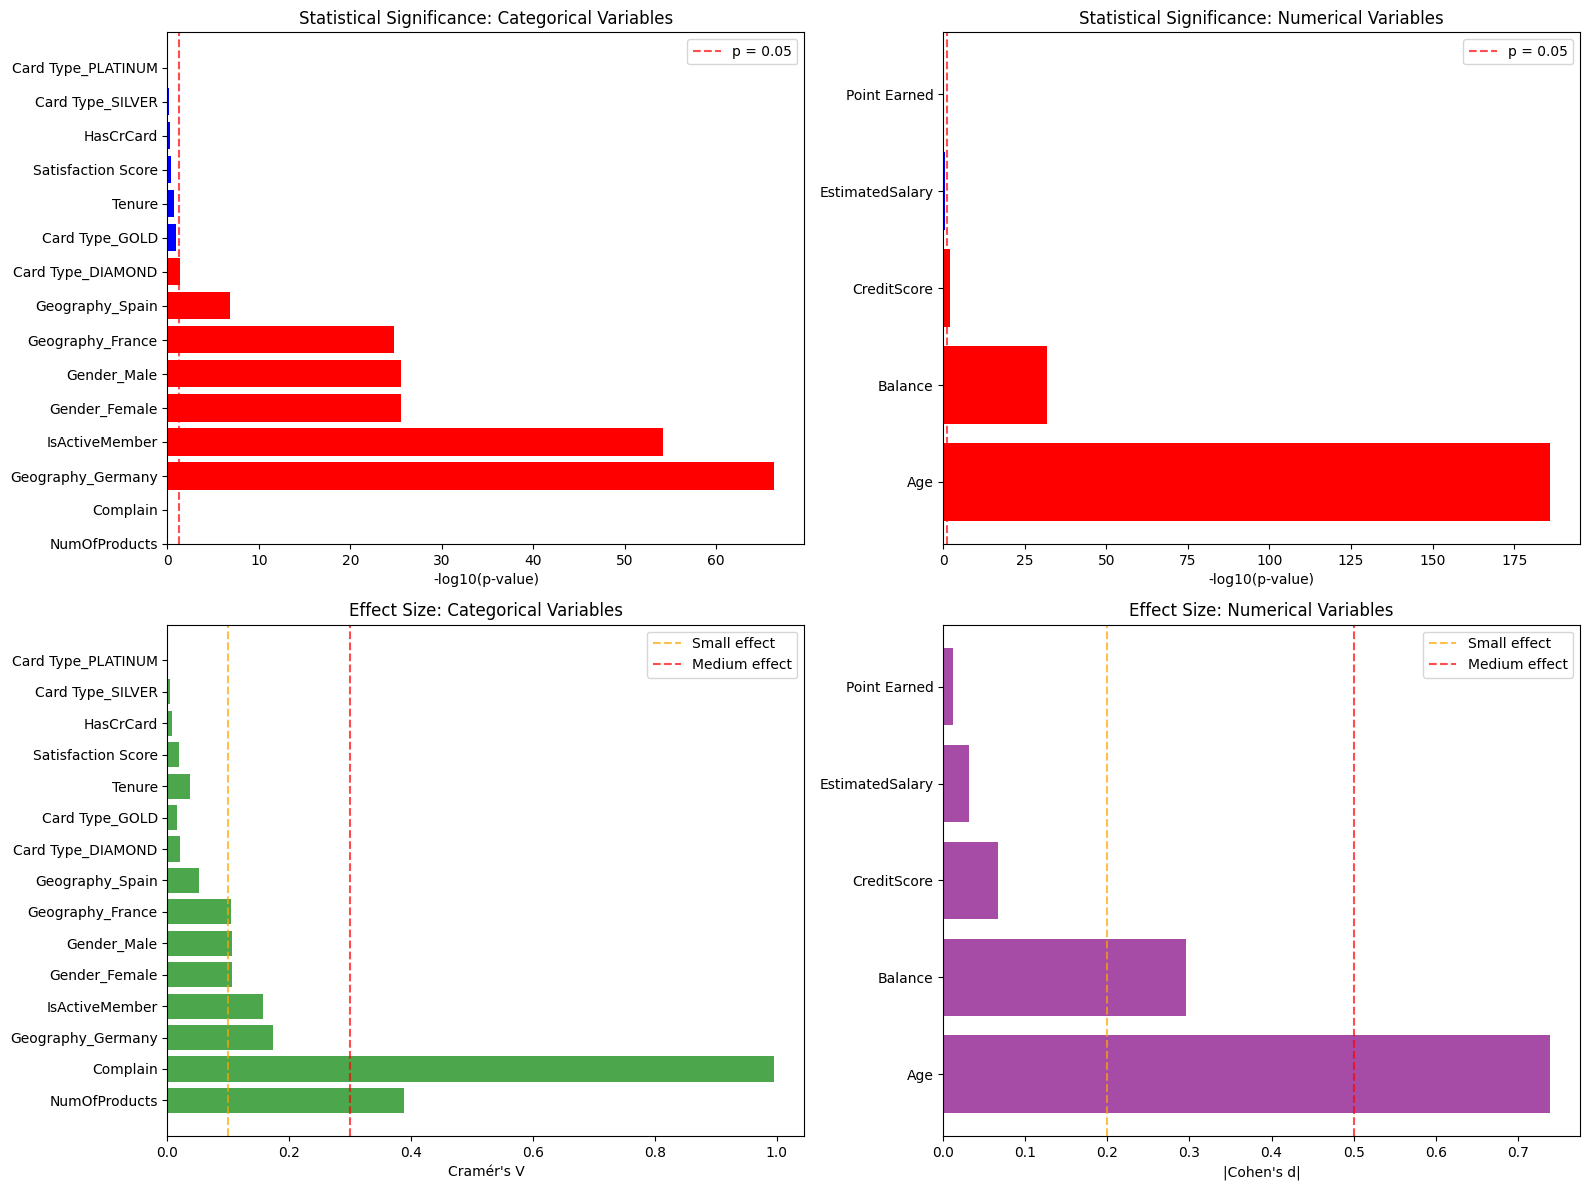

In [16]:
# Create summary DataFrames
chi2_df = pd.DataFrame(chi2_results)
t_test_df = pd.DataFrame(t_test_results)

# Summary of significant variables
print("SIGNIFICANT VARIABLES (p < 0.05)")
print("=" * 40)

print("\nCategorical Variables:")
significant_cat = chi2_df[chi2_df['Significant'] == True].sort_values('p_value')
if len(significant_cat) > 0:
    for _, row in significant_cat.iterrows():
        print(f"  {row['Variable']:20} | p = {row['p_value']:.6f} | Cramér's V = {row['Cramers_V']:.4f}")
else:
    print("  No significant categorical variables found")

print("\nNumerical Variables:")
significant_num = t_test_df[t_test_df['Significant'] == True].sort_values('p_value')
if len(significant_num) > 0:
    for _, row in significant_num.iterrows():
        print(f"  {row['Variable']:20} | p = {row['p_value']:.6f} | Cohen's d = {row['Cohens_d']:.4f}")
else:
    print("  No significant numerical variables found")
    
    
    
# Create visualizations for statistical results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. P-values for categorical variables
chi2_df_sorted = chi2_df.sort_values('p_value')
colors = ['red' if x < 0.05 else 'blue' for x in chi2_df_sorted['p_value']]
ax1.barh(range(len(chi2_df_sorted)), -np.log10(chi2_df_sorted['p_value']), color=colors)
ax1.set_yticks(range(len(chi2_df_sorted)))
ax1.set_yticklabels(chi2_df_sorted['Variable'])
ax1.axvline(x=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='p = 0.05')
ax1.set_xlabel('-log10(p-value)')
ax1.set_title('Statistical Significance: Categorical Variables')
ax1.legend()

# 2. P-values for numerical variables
t_test_df_sorted = t_test_df.sort_values('p_value')
colors = ['red' if x < 0.05 else 'blue' for x in t_test_df_sorted['p_value']]
ax2.barh(range(len(t_test_df_sorted)), -np.log10(t_test_df_sorted['p_value']), color=colors)
ax2.set_yticks(range(len(t_test_df_sorted)))
ax2.set_yticklabels(t_test_df_sorted['Variable'])
ax2.axvline(x=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='p = 0.05')
ax2.set_xlabel('-log10(p-value)')
ax2.set_title('Statistical Significance: Numerical Variables')
ax2.legend()

# 3. Effect sizes for categorical variables
ax3.barh(range(len(chi2_df_sorted)), chi2_df_sorted['Cramers_V'], color='green', alpha=0.7)
ax3.set_yticks(range(len(chi2_df_sorted)))
ax3.set_yticklabels(chi2_df_sorted['Variable'])
ax3.axvline(x=0.1, color='orange', linestyle='--', alpha=0.7, label='Small effect')
ax3.axvline(x=0.3, color='red', linestyle='--', alpha=0.7, label='Medium effect')
ax3.set_xlabel("Cramér's V")
ax3.set_title('Effect Size: Categorical Variables')
ax3.legend()

# 4. Effect sizes for numerical variables
ax4.barh(range(len(t_test_df_sorted)), np.abs(t_test_df_sorted['Cohens_d']), color='purple', alpha=0.7)
ax4.set_yticks(range(len(t_test_df_sorted)))
ax4.set_yticklabels(t_test_df_sorted['Variable'])
ax4.axvline(x=0.2, color='orange', linestyle='--', alpha=0.7, label='Small effect')
ax4.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Medium effect')
ax4.set_xlabel("|Cohen's d|")
ax4.set_title('Effect Size: Numerical Variables')
ax4.legend()

plt.tight_layout()
plt.show()


Statisitcal Analysis has shown the significance and the effect sizes of each of the variables. 

Looking at it from an ML perspective, I think it is best to not use the complain statistic, as it almost perfectly predicts the target variable to a very high statistical significance. 

## Prediction Model and Evaluation

In this section we look at the most suitable models to use for classifiying the data and how best to evaluate the models for this specific classification task. 

### Preprocessing

The data is scaled using StandardScaler to preserve the distributions of the features. 

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = model_preprocessing(cleaned_data)

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution in training: {y_train.value_counts().to_dict()}")
print(f"Class distribution in validation: {y_val.value_counts().to_dict()}")
print(f"Class distribution in test: {y_test.value_counts().to_dict()}")


Training set: 7000 samples, 19 features
Validation set: 1500 samples
Test set: 1500 samples
Class distribution in training: {0: 5573, 1: 1427}
Class distribution in validation: {0: 1194, 1: 306}
Class distribution in test: {0: 1195, 1: 305}


### Evaluation

This is a binary classification task, so we are looking at a number of metrics: accuracy, precision, recall and ROC AUC. 

These metrics are methods of analysing the classification performance using the comparision of True and False Positives and Negatives.



## Model Comparison and Hyperparameter Optimization

In this section, we will test multiple machine learning algorithms with hyperparameter optimization using Optuna. We'll optimize for recall as it's most crucial for identifying customers at risk of churning.

### Models to Test:
- Random Forest
- AdaBoost
- SVM
- MLP (Neural Network)
- Gradient Boosting
- Logistic Regression
- Naive Bayes (Gaussian)
- Decision Tree
- XGBoost

Each model will be optimized using Optuna with 50 trials, focusing on maximizing recall.


In [18]:
# Import required libraries for model comparison
import optuna
import xgboost as xgb

# Set random seeds for reproducibility
np.random.seed(42)
optuna.logging.set_verbosity(optuna.logging.WARNING) 

/Users/nguyendog/code/venvs/finance_ml_venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Create comprehensive feature names for better interpretability
# These match the one-hot encoded features from preprocessing

# Original numerical features (in order from preprocessing)
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]

# One-hot encoded categorical features
categorical_features = [
    'Gender_Female', 'Gender_Male',
    'Geography_France', 'Geography_Germany', 'Geography_Spain',
    'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_SILVER'
]

# Combine all features
feature_names = numerical_features + categorical_features

print("📊 Feature Names Created:")
print(f"Total features: {len(feature_names)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features (one-hot encoded): {len(categorical_features)}")
print("\n🔢 Numerical Features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"  {i:2d}. {feature}")
print("\n🏷️  Categorical Features (One-Hot Encoded):")
for i, feature in enumerate(categorical_features, len(numerical_features) + 1):
    print(f"  {i:2d}. {feature}")

# Verify feature count matches data
print(f"\n✅ Data shape verification:")
print(f"Expected features: {len(feature_names)}")
print(f"Actual data features: {X_train.shape[1]}")
if len(feature_names) == X_train.shape[1]:
    print("✅ Feature count matches!")
else:
    print("⚠️  Feature count mismatch - check preprocessing!")


📊 Feature Names Created:
Total features: 18
Numerical features: 10
Categorical features (one-hot encoded): 8

🔢 Numerical Features:
   1. CreditScore
   2. Age
   3. Tenure
   4. Balance
   5. NumOfProducts
   6. HasCrCard
   7. IsActiveMember
   8. EstimatedSalary
   9. Satisfaction Score
  10. Point Earned

🏷️  Categorical Features (One-Hot Encoded):
  11. Gender_Female
  12. Gender_Male
  13. Geography_France
  14. Geography_Germany
  15. Geography_Spain
  16. Card Type_DIAMOND
  17. Card Type_GOLD
  18. Card Type_SILVER

✅ Data shape verification:
Expected features: 18
Actual data features: 19
⚠️  Feature count mismatch - check preprocessing!


In [20]:
from joblib import dump

# Save the data
datasets = {
    'X_train': X_train, 'y_train': y_train,
    'X_val': X_val, 'y_val': y_val, 
    'X_test': X_test, 'y_test': y_test,
    'feature_names': feature_names
}

dump(datasets, 'data/processed_datasets.joblib')


['data/processed_datasets.joblib']

🌲 Training Random Forest (Optuna CV)...

 Best Parameters Found:
----------------------------------------
n_estimators: 414
max_depth: 24
min_samples_split: 19
min_samples_leaf: 1
max_features: log2
Best CV ROC AUC: 0.8454

📊 Random Forest Results:
Accuracy:  0.8247
Precision: 0.5530
Recall:    0.7180
F1-Score:  0.6248
AUC:       0.8787
Threshold: 0.4323
Train Time (opt+fit): 286.10s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.85      0.89      1195
       Churn       0.55      0.72      0.62       305

    accuracy                           0.82      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.85      0.82      0.83      1500



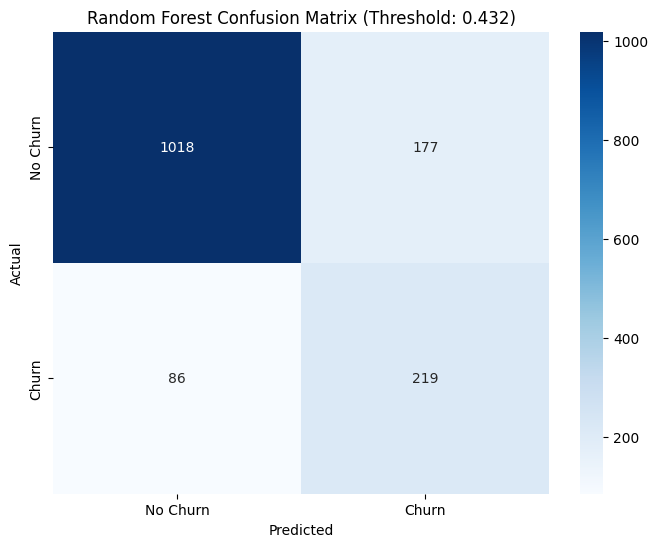

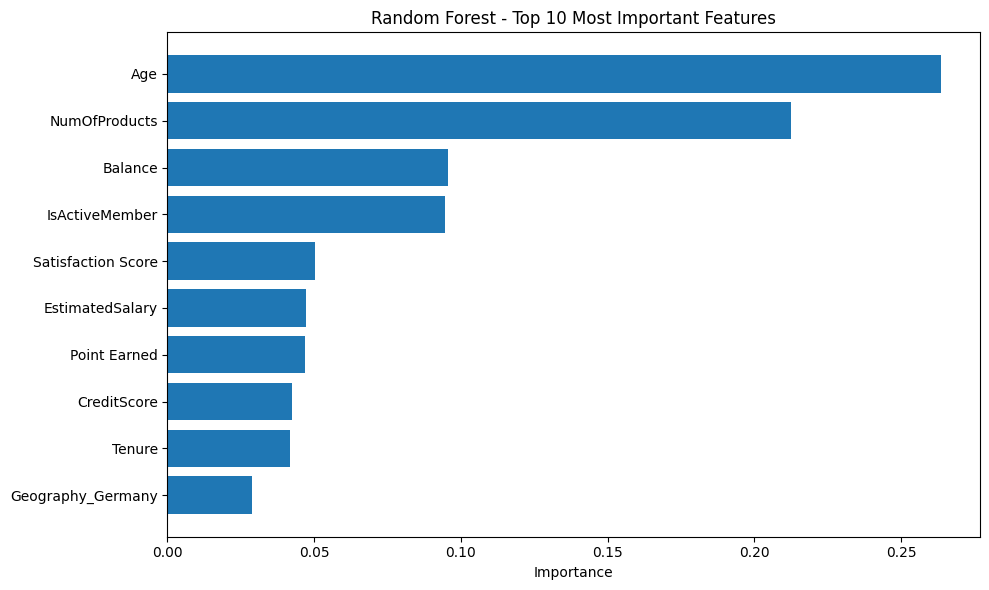


Random Forest - Top 10 Most Important Features:
--------------------------------------------------
 1. Age                       0.2637
 2. NumOfProducts             0.2126
 3. Balance                   0.0957
 4. IsActiveMember            0.0944
 5. Satisfaction Score        0.0503
 6. EstimatedSalary           0.0473
 7. Point Earned              0.0468
 8. CreditScore               0.0423
 9. Tenure                    0.0418
10. Geography_Germany         0.0286
Model saved: data/models/random_forest_model.joblib
Metadata saved: data/models/random_forest_metadata.joblib


In [21]:
# Import individual model functions
from src.models import (
    train_random_forest, train_xgboost, train_logistic_regression, 
    train_mlp, train_naive_bayes, train_adaboost, train_decision_tree, train_svm
)

print("="*70)

# Train Random Forest
rf_model, rf_threshold, rf_metrics = train_random_forest(
    X_train, y_train, X_val, y_val, X_test, y_test, feature_names=feature_names, n_trials=100
)



🚀 Training XGBoost (Optuna CV)...

🎯 Best Parameters Found:
----------------------------------------
n_estimators: 420
max_depth: 8
learning_rate: 0.04492855805451496
subsample: 0.9543301817355591
colsample_bytree: 0.6113582224290375
min_child_weight: 1
gamma: 4.546503903764255
reg_alpha: 4.055766202817962
reg_lambda: 3.323445958716261e-06
Best CV ROC AUC: 0.8545

📊 XGBoost Results:
Accuracy:  0.8380
Precision: 0.5787
Recall:    0.7475
F1-Score:  0.6524
AUC:       0.8920
Threshold: 0.3806
Train Time (opt+fit): 37.73s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.93      0.86      0.89      1195
       Churn       0.58      0.75      0.65       305

    accuracy                           0.84      1500
   macro avg       0.75      0.80      0.77      1500
weighted avg       0.86      0.84      0.85      1500



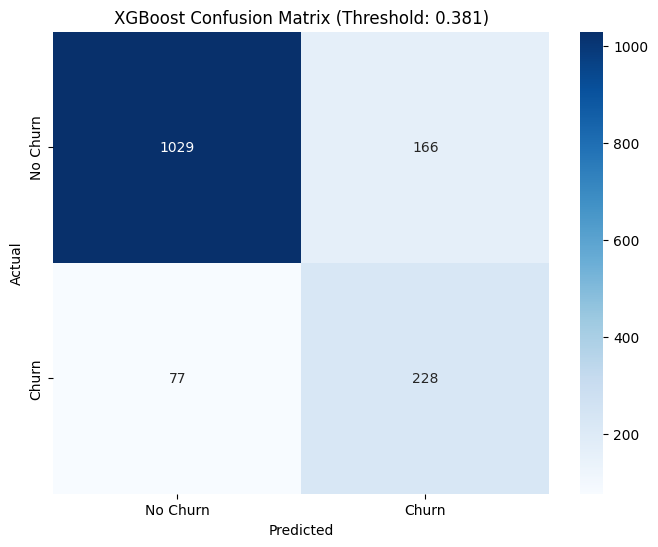

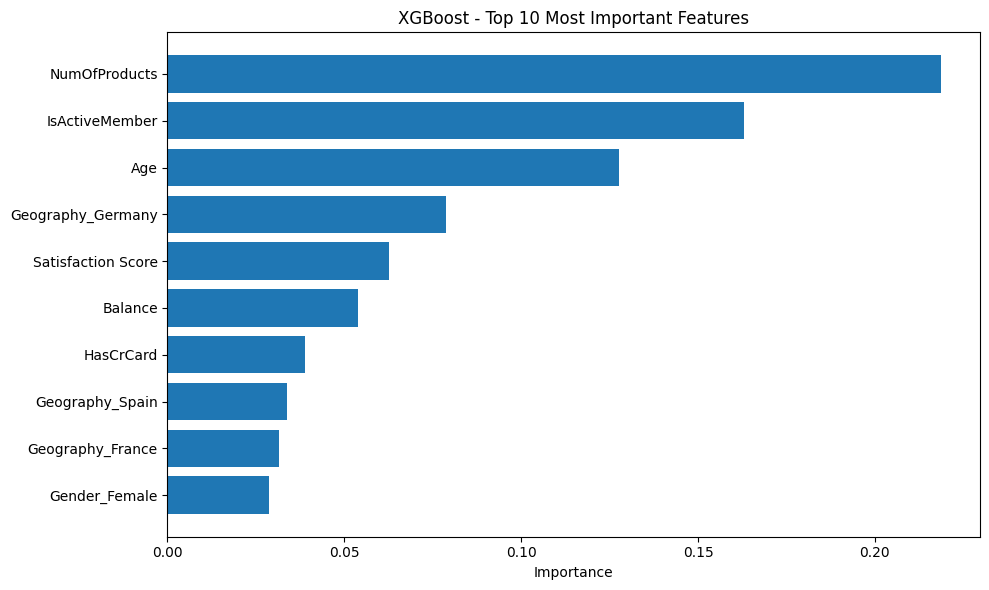


XGBoost - Top 10 Most Important Features:
--------------------------------------------------
 1. NumOfProducts             0.2188
 2. IsActiveMember            0.1629
 3. Age                       0.1276
 4. Geography_Germany         0.0789
 5. Satisfaction Score        0.0627
 6. Balance                   0.0537
 7. HasCrCard                 0.0387
 8. Geography_Spain           0.0339
 9. Geography_France          0.0315
10. Gender_Female             0.0286
Model saved: data/models/xgboost_model.joblib
Metadata saved: data/models/xgboost_metadata.joblib


In [22]:
# Train XGBoost
print("\n" + "="*70)
xgb_model, xgb_threshold, xgb_metrics = train_xgboost(
    X_train, y_train, X_val, y_val, X_test, y_test,  feature_names=feature_names, n_trials=100
)



📈 Training Logistic Regression...

 Best Parameters Found:
----------------------------------------
penalty: elasticnet
C: 0.010051991624775842
l1_ratio: 0.9976010757745074
Best CV ROC AUC: 0.7587

📊 Logistic Regression Results:
Accuracy:  0.7420
Precision: 0.4218
Recall:    0.7246
F1-Score:  0.5332
AUC:       0.8087
Threshold: 0.5051
Train Time (opt+fit): 8.22s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.75      0.82      1195
       Churn       0.42      0.72      0.53       305

    accuracy                           0.74      1500
   macro avg       0.67      0.74      0.68      1500
weighted avg       0.81      0.74      0.76      1500



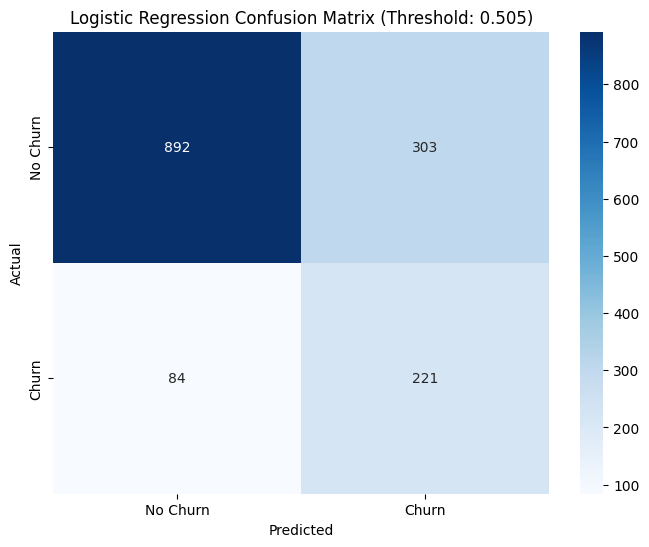


Logistic Regression - Top 10 Most Important Features:
------------------------------------------------------------
 1. Age                       0.8184
 2. IsActiveMember            -0.4419
 3. Geography_Germany         0.3188
 4. Balance                   0.1464
 5. Gender_Female             0.1067
 6. Gender_Male               -0.1067
 7. CreditScore               -0.0424
 8. Card Type_GOLD            -0.0298
 9. Point Earned              -0.0159
10. NumOfProducts             -0.0145
Model saved: data/models/logistic_regression_model.joblib
Metadata saved: data/models/logistic_regression_metadata.joblib


In [23]:
# Train Logistic Regression
print("\n" + "="*70)
lr_model, lr_threshold, lr_metrics = train_logistic_regression(
    X_train, y_train, X_val, y_val, X_test, y_test,  feature_names=feature_names, n_trials=100
)



🧠 Training MLP (Neural Network)...

 Best Parameters Found:
----------------------------------------
hidden_layer_sizes: (50,)
activation: relu
solver: adam
alpha: 0.00019307218413848291
learning_rate: adaptive
Best CV ROC AUC: 0.8235

📊 MLP Results:
Accuracy:  0.7567
Precision: 0.4425
Recall:    0.7574
F1-Score:  0.5586
AUC:       0.8422
Threshold: 0.3750
Train Time (opt+fit): 109.73s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.76      0.83      1195
       Churn       0.44      0.76      0.56       305

    accuracy                           0.76      1500
   macro avg       0.68      0.76      0.70      1500
weighted avg       0.83      0.76      0.78      1500



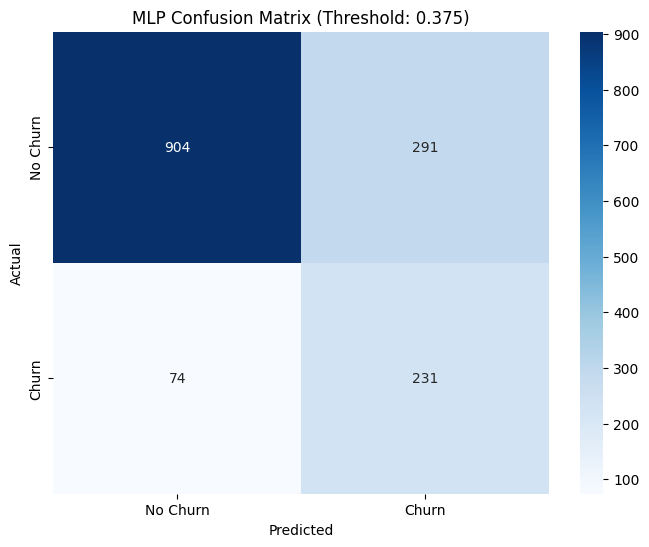


MLP does not support feature importance analysis.
Model saved: data/models/mlp_model.joblib
Metadata saved: data/models/mlp_metadata.joblib


In [24]:
# Train MLP (Neural Network)
print("\n" + "="*70)
mlp_model, mlp_threshold, mlp_metrics = train_mlp(
    X_train, y_train, X_val, y_val, X_test, y_test,
    feature_names=feature_names, n_trials=100
)



🚀 Training AdaBoost...

Best Parameters Found:
----------------------------------------
n_estimators: 445
learning_rate: 1.1901176834415232
Best CV ROC AUC: 0.8375

📊 AdaBoost Results:
Accuracy:  0.8180
Precision: 0.5390
Recall:    0.7246
F1-Score:  0.6182
AUC:       0.8748
Threshold: 0.4947
Train Time (opt+fit): 293.55s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.84      0.88      1195
       Churn       0.54      0.72      0.62       305

    accuracy                           0.82      1500
   macro avg       0.73      0.78      0.75      1500
weighted avg       0.84      0.82      0.83      1500



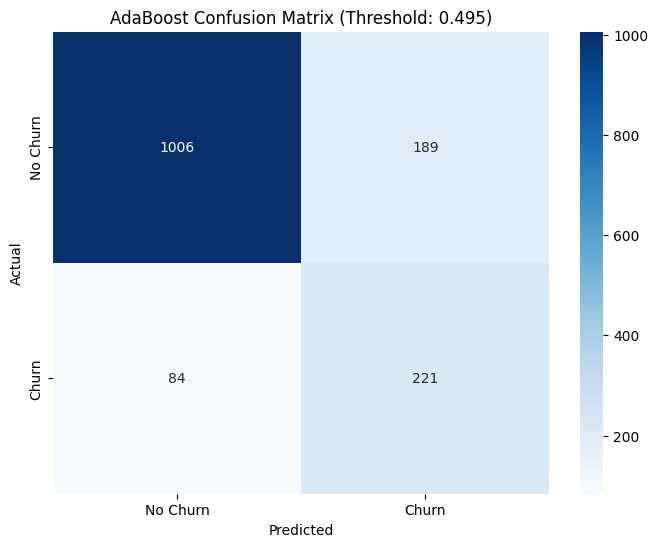

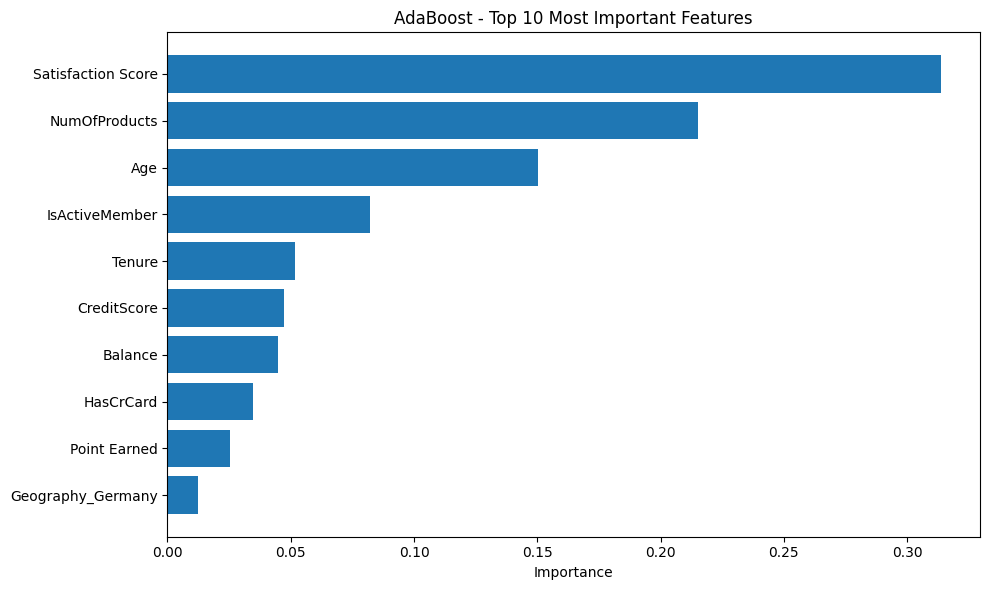


AdaBoost - Top 10 Most Important Features:
--------------------------------------------------
 1. Satisfaction Score        0.3138
 2. NumOfProducts             0.2150
 3. Age                       0.1504
 4. IsActiveMember            0.0820
 5. Tenure                    0.0517
 6. CreditScore               0.0473
 7. Balance                   0.0447
 8. HasCrCard                 0.0346
 9. Point Earned              0.0255
10. Geography_Germany         0.0123
Model saved: data/models/adaboost_model.joblib
Metadata saved: data/models/adaboost_metadata.joblib


In [25]:
# Train AdaBoost
print("\n" + "="*70)
adaboost_model, adaboost_threshold, adaboost_metrics = train_adaboost(
    X_train, y_train, X_val, y_val, X_test, y_test,
    feature_names=feature_names, n_trials=100
)



🌳 Training Decision Tree...

 Best Parameters Found:
----------------------------------------
max_depth: 8
min_samples_split: 28
min_samples_leaf: 6
max_features: None
Best CV ROC AUC: 0.8141

📊 Decision Tree Results:
Accuracy:  0.8200
Precision: 0.5418
Recall:    0.7443
F1-Score:  0.6271
AUC:       0.8722
Threshold: 0.4297
Train Time (opt+fit): 5.49s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.93      0.84      0.88      1195
       Churn       0.54      0.74      0.63       305

    accuracy                           0.82      1500
   macro avg       0.73      0.79      0.75      1500
weighted avg       0.85      0.82      0.83      1500



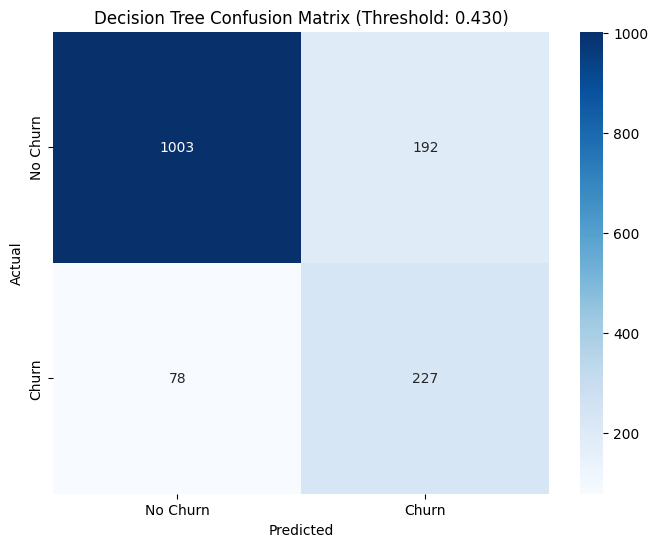

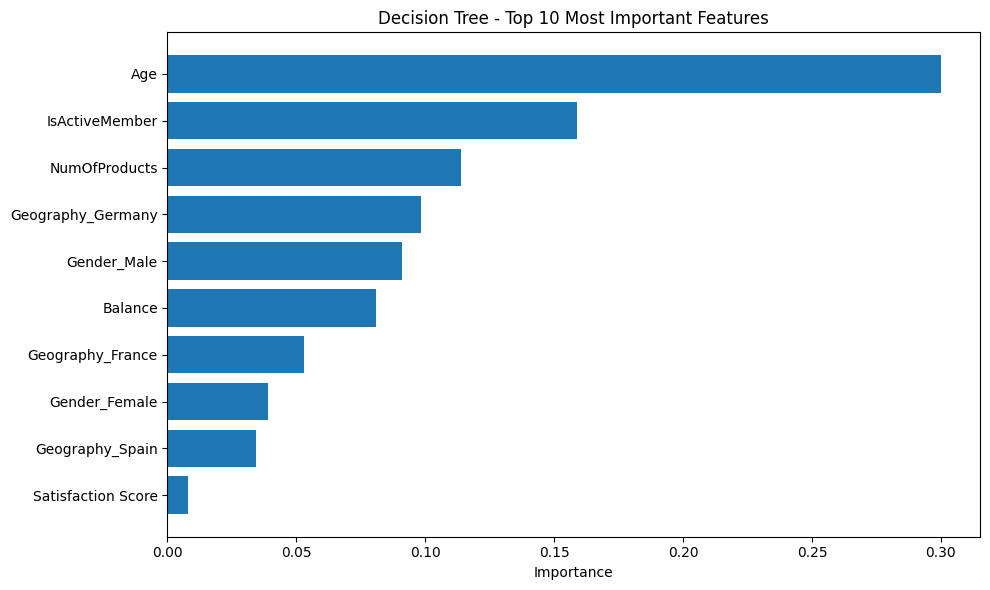


Decision Tree - Top 10 Most Important Features:
--------------------------------------------------
 1. Age                       0.3002
 2. IsActiveMember            0.1590
 3. NumOfProducts             0.1139
 4. Geography_Germany         0.0983
 5. Gender_Male               0.0910
 6. Balance                   0.0810
 7. Geography_France          0.0530
 8. Gender_Female             0.0390
 9. Geography_Spain           0.0343
10. Satisfaction Score        0.0078
Model saved: data/models/decision_tree_model.joblib
Metadata saved: data/models/decision_tree_metadata.joblib


In [26]:
# Train Decision Tree
print("\n" + "="*70)
dt_model, dt_threshold, dt_metrics = train_decision_tree(
    X_train, y_train, X_val, y_val, X_test, y_test,
    feature_names=feature_names, n_trials=100
)



📊 Training Naive Bayes (pipeline)...

📊 Naive Bayes Results:
Accuracy:  0.7293
Precision: 0.4087
Recall:    0.7410
F1-Score:  0.5268
AUC:       0.8021
Threshold: 0.4469
Train Time (fit): 0.01s

📋 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.73      0.81      1195
       Churn       0.41      0.74      0.53       305

    accuracy                           0.73      1500
   macro avg       0.66      0.73      0.67      1500
weighted avg       0.81      0.73      0.75      1500



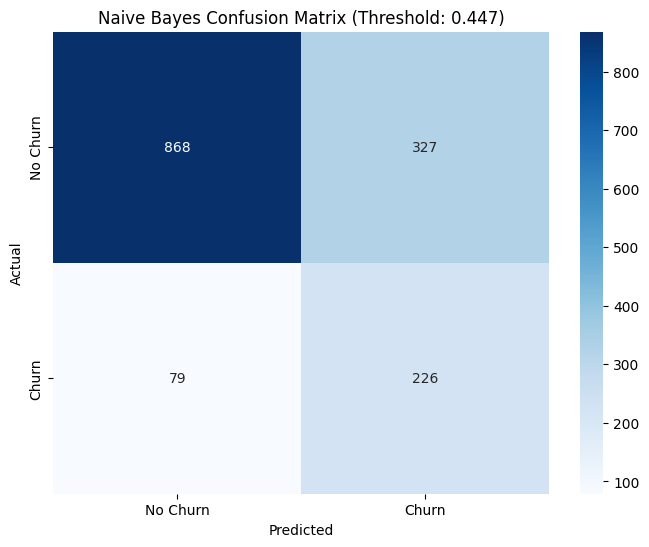


Naive Bayes does not support feature importance analysis.
Model saved: data/models/naive_bayes_model.joblib
Metadata saved: data/models/naive_bayes_metadata.joblib


In [27]:
# Train Naive Bayes
print("\n" + "="*70)
nb_model, nb_threshold, nb_metrics = train_naive_bayes(
    X_train, y_train, X_val, y_val, X_test, y_test,
    feature_names=feature_names, n_trials=100
)



📊 Customer Churn Prediction - Model Comparison

📋 PERFORMANCE SUMMARY TABLE
Model                Accuracy   Precision  Recall     F1-Score   AUC        Time(s)   
--------------------------------------------------------------------------------
Random Forest        0.8247     0.5530     0.7180     0.6248     0.8787     286.10    
XGBoost              0.8380     0.5787     0.7475     0.6524     0.8920     37.73     
Logistic Regression  0.7420     0.4218     0.7246     0.5332     0.8087     8.22      
MLP                  0.7567     0.4425     0.7574     0.5586     0.8422     109.73    
Naive Bayes          0.7293     0.4087     0.7410     0.5268     0.8021     0.01      
Decision Trees       0.8200     0.5418     0.7443     0.6271     0.8722     5.49      
ADABoost             0.8180     0.5390     0.7246     0.6182     0.8748     293.55    

🏆 KEY INSIGHTS
🥇 Best Recall:     MLP (0.7574)
🥇 Best Accuracy:  XGBoost (0.8380)
🥇 Best F1-Score: XGBoost (0.6524)
⚡ Fastest:        Naive Bayes

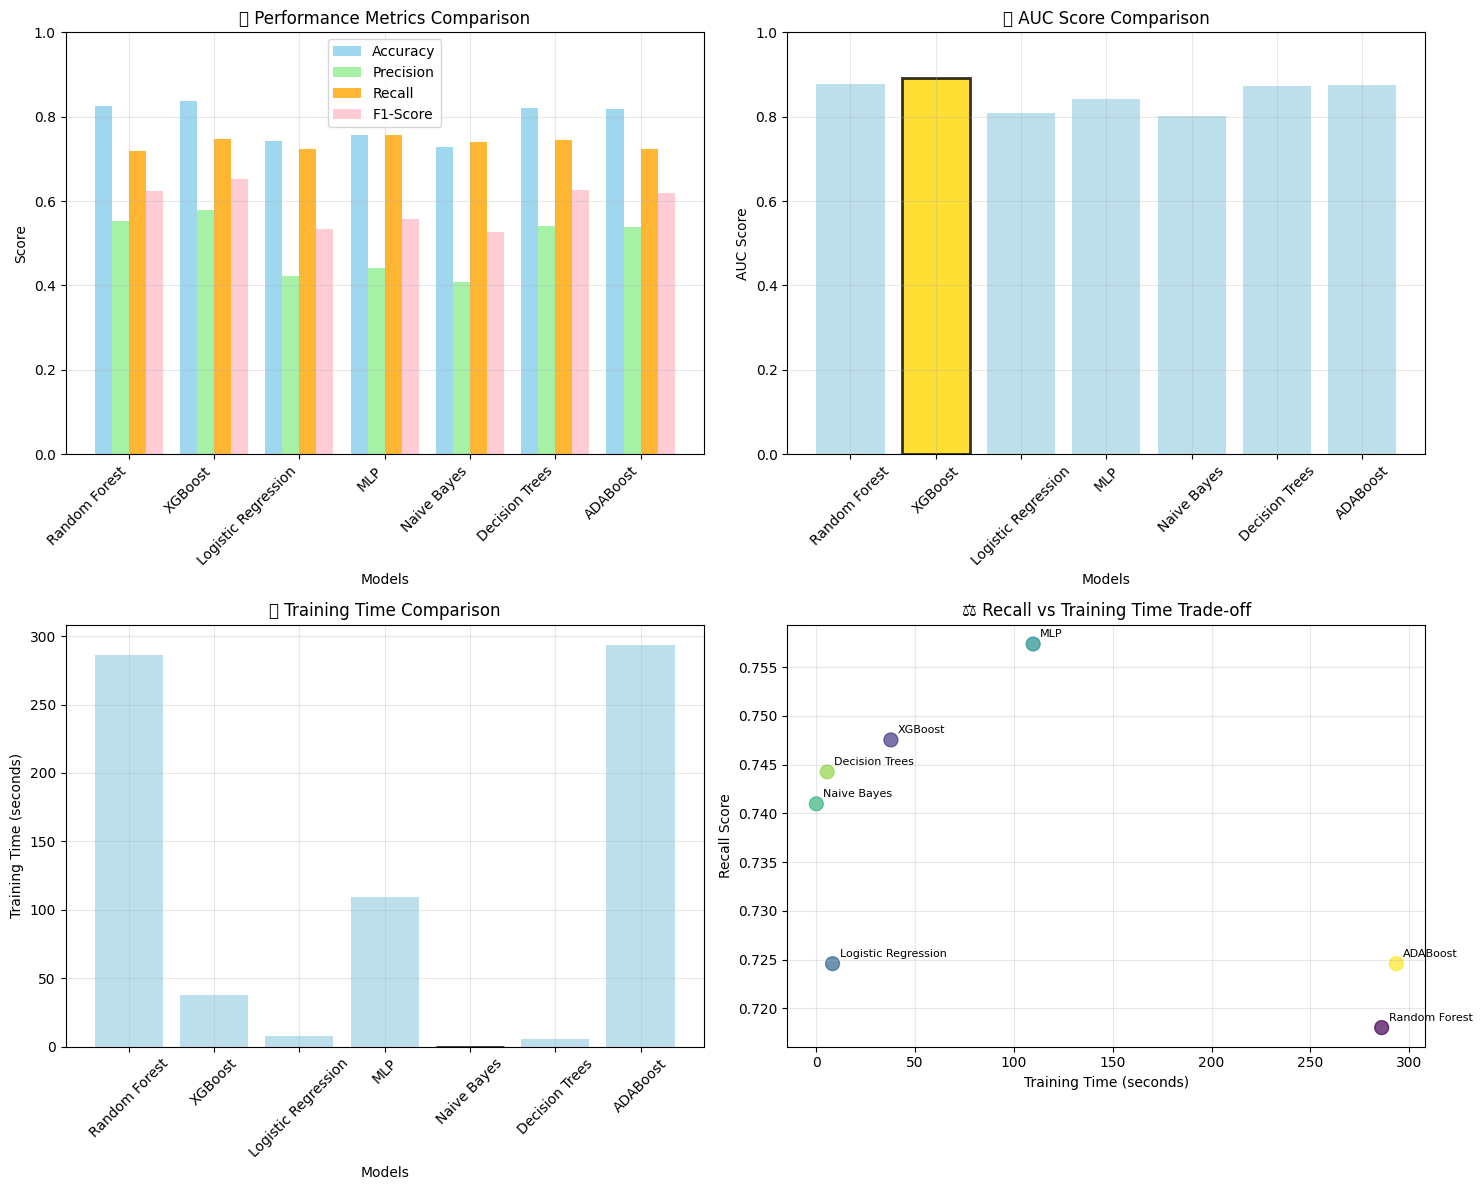


💼 BUSINESS RECOMMENDATIONS
🎯 RECOMMENDED MODEL: Decision Trees
   • Recall: 0.7443 (Catches 74.4% of churning customers)
   • Training Time: 5.49s (Fast deployment)
   • Overall Performance: 0.6787

✅ GOOD: MLP achieves >70% recall

📈 DEPLOYMENT STRATEGY:
   • Use Decision Trees for production
   • Monitor performance monthly
   • Retrain quarterly with new data
   • Set up alerts for recall drops below 70%
📊 Model Comparison Function Ready!
After training all models, use:
1. Collect models in a dictionary
2. Call compare_all_models(models_dict)
3. Get business-ready insights and recommendations

The function will provide:
• Performance summary table
• Key insights (best performers)
• Visual comparison charts
• Business recommendations
• Deployment strategy


In [28]:
# Import the comparison function
from src.models import compare_all_models

# Collect all trained models with their metrics
models_comparison = {
    'Random Forest': (rf_model, rf_threshold, rf_metrics),
    'XGBoost': (xgb_model, xgb_threshold, xgb_metrics),
    'Logistic Regression': (lr_model, lr_threshold, lr_metrics),
    'MLP': (mlp_model, mlp_threshold, mlp_metrics),
    'Naive Bayes': (nb_model, nb_threshold, nb_metrics),
    'Decision Trees': (dt_model, dt_threshold, dt_metrics),
    'ADABoost': (adaboost_model, adaboost_threshold, adaboost_metrics)
}

# Run the comprehensive comparison
results = compare_all_models(models_comparison, "Customer Churn Prediction - Model Comparison")

print("📊 Model Comparison Function Ready!")
print("=" * 50)
print("After training all models, use:")
print("1. Collect models in a dictionary")
print("2. Call compare_all_models(models_dict)")
print("3. Get business-ready insights and recommendations")
print("\nThe function will provide:")
print("• Performance summary table")
print("• Key insights (best performers)")
print("• Visual comparison charts")
print("• Business recommendations")
print("• Deployment strategy")